In [ ]:
import matplotlib.pyplot as plt
import random
import copy

In [ ]:
class Problem(object):
    """Abstrakcyjna klasa problemów przeszukiwania."""

    def __init__(self, initial=None):
        """Podaj stan początkowy i opcjonalnie stany końcowe.
           Podklasy mogą mieć dodatkowe argumenty. Patrz wyżej, jak wywołać konstruktor nadklasy."""
        self.initial = initial  # Stan początkowy problemu.

    def actions(self, state):
        "Zwraca listę akcji ze stanu `state`."
        raise NotImplementedError # Do napisania w podklasie!

    def result(self, state, action):
        "Stan, który jest rezultatem wykonania akcji `action` na stanie `state`."
        raise NotImplementedError # Do napisania w podklasie!

    def is_goal(self, state):
        "Zwraca `True`, gdy stan jest rozwiązaniem." 
        raise NotImplementedError # Do napisania w podklasie!

    def step_cost(self, state, action, result=None):
        "Koszt wykonania akcji `action` ze stanu `state`. `result` może być pomocniczne, gdy go znamy."
        return 1 # Do nadpisania, gdy koszty nie są jednostkowe!

In [ ]:
class Hetman(Problem):
  """Klasa definiujaca problem"""
  def __init__(self, n:int): 
    if n < 4:
      raise ValueError("The size must equal or greater than 4!")
    self.n = n
    self.initial = [[0 for i in range(n)] for i in range(n)]

  def actions(self, state):
    "Zwraca listę akcji ze stanu `state`. Indeksy pol na ktorych mozna jeszcze postawic hetmana"
    actions = []
    for i in range(self.n):
      for j in range(self.n):
        # czy w wierszu nie ma juz hetmana
        if sum(state[i]) > 0:
          # print(f"Wiersz dla elementu {i}{j}")
          continue
        #czy w kolumnie nia ma juz hetmana
        if sum([state[s][j] for s in range(self.n)]) > 0:
          # print(f"Kolumna dla elementu {i}{j}")
          continue
        # czy po przekatnej nie ma juz hetmana
        # upper left
        diag_1 = [state[i-s][j-s] for s in range(1, min(i,j) + 1)]
        #lower right
        diag_2 = [state[i+s][j+s] for s in range(0, min(self.n - i,self.n -j) )]
        #upper right
        diag_3 = [state[i-s][j+s] for s in range(0, min(i+1,self.n -j))]
        #lower left
        diag_4 = [state[i+s][j-s] for s in range(0, min(self.n - i,j+1))]
        if sum(diag_1) + sum(diag_2)+ sum(diag_3) + sum(diag_4) >0:
          # print(f"Przekątna dla elementu {i}{j}")
          continue
        #mozna a tym polu postawic hetmana
        actions.append((i,j))
    return actions

  def result(self, state, action):
    "Stan, który jest rezultatem wykonania akcji `action` na stanie `state`."
    new_state = copy.deepcopy(state)
    i,j = action
    new_state[i][j] = 1
    return new_state
  def is_goal(self, state):
    if sum([sum(row) for row in state]) == self.n:
      return True
    else:
      return False

In [ ]:
def visualize_table(state):
  plt.matshow(state, cmap="Greys")
  plt.grid()
  plt.show()

#Testy wizualizacji

In [ ]:
my_problem = Hetman(8)

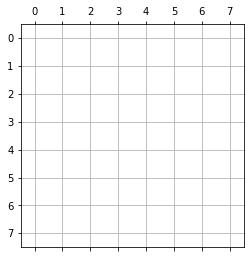

In [ ]:
visualize_table(my_problem.initial)

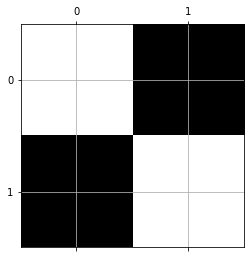

In [ ]:
visualize_table([[0,1],[1,0]])

#Test wolnych lokalizacji

In [ ]:
my_problem = Hetman(4)
my_problem.actions( my_problem.initial)

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [ ]:
my_problem_2 = Hetman(4)
my_problem_2.actions([[0,0,0,0],[1,0,0,0],[0,0,0,0],[0,1,0,0]])

[(0, 2), (0, 3), (2, 3)]

Test gry (losowy)

Next action (5, 0)


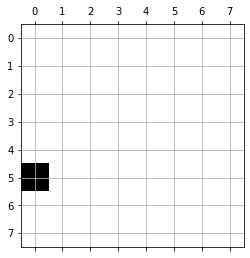

Next action (2, 4)


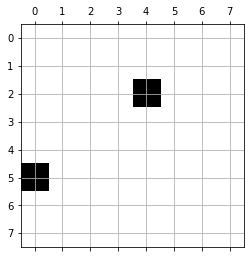

Next action (6, 7)


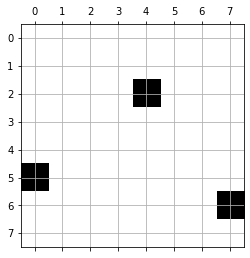

Next action (4, 3)


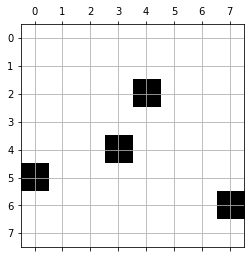

Next action (7, 5)


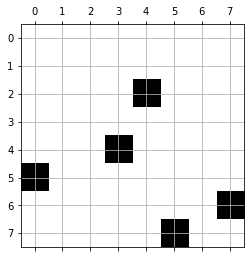

Next action (3, 6)


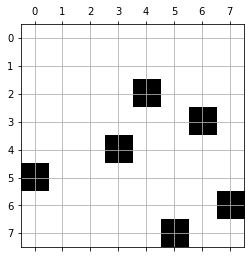

Next action (1, 1)


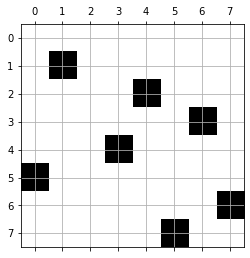

Porażka


In [ ]:
#zaczynamy nowa gre z pusta plansza 8x8
nowa_gra = Hetman(8)
#stan gry
state = nowa_gra.initial
#mozliwe do wykonania ruchy
possible_actions = nowa_gra.actions(state)


while len(possible_actions) > 0:
  #losujemy ruch
  next_action = random.sample(possible_actions, 1)[0]
  print(f"Next action {next_action}")
  state = nowa_gra.result(state, next_action)
  visualize_table(state)
  possible_actions = nowa_gra.actions(state)
if nowa_gra.is_goal(state):
  print("Zwycięstwo")
else: 
  print("Porażka")

Wierzcholki grafu

In [ ]:
class Node(object):
    """Węzeł w drzewie przeszukiwania.
       Jeśli do tego samego stanu można dojść na dwa sposoby, będą to oddzielne węzły."""

    def __init__(self, state, previous=None, action=None):
        """Tworzy nowy węzeł o stanie `state` na podstawie poprzedniego `previous` po akcji `action`
           i koszcie `step_cost`.
           Węzeł startowy ma `previous` i `action` równe None."""
        self.state = state

        #wezly
        self.previous = previous
        self.action = action

        
    def children(self, problem:Problem):
        """Rozwija dany węzeł w danym problemie `problem` i zwraca węzły potomne."""
        # Hint: self to po prostu obecny obiekt, więc można podać go jako argument do Node(..., self, ...).
        return [Node(problem.result(self.state, new_action), self, new_action) for new_action in  problem.actions(self.state)]

    def parents(self):
      """Rozwija dany węzeł wstecz."""
      all_previous_states = []
      previous = self.previous
      while previous:
        all_previous_states.append(previous.state)
        previous = previous.previous
      all_previous_states.reverse()
      return all_previous_states

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


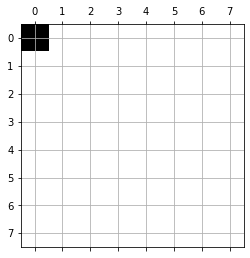

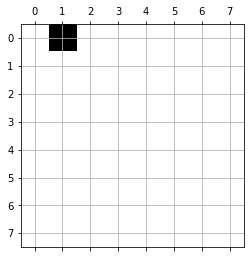

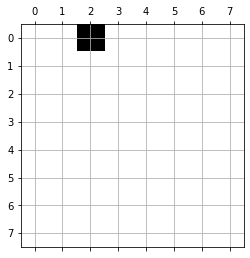

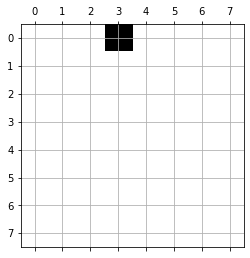

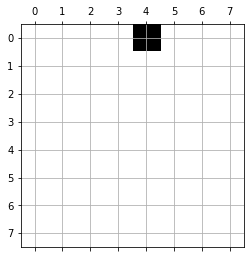

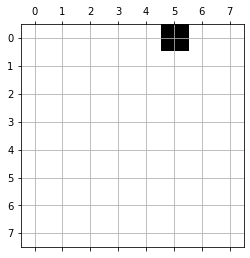

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


In [ ]:
my_problem = Hetman(8)
initial_node = Node(my_problem.initial)
print(my_problem.initial)
i = 0
for next_action in initial_node.children(my_problem):
  visualize_table(next_action.state)
  i = i+1
  if i > 5:
    break
print(my_problem.initial)


In [ ]:
from collections import deque

class FIFOQueue():
    #BFS
    def __init__(self):
        self.queue = deque()
        
    def add(self, node):
        self.queue.append(node)
        
    def pop(self):
        return self.queue.popleft()
        
    def __len__(self):
        return len(self.queue)

class LIFOQueue():
    #DFS
    def __init__(self):
        self.queue = deque()
        
    def add(self, node):
        self.queue.append(node)
        
    def pop(self):
        return self.queue.pop()
        
    def __len__(self):
        return len(self.queue)



In [ ]:
def search(problem:Problem, queue, verbose=False):
    """Algorytm przeszukiwania parametryzowany problemem i obiektem implementującą kolejkę.
       Zwraca węzeł reprezentujący stan będący rozwiązaniem."""
    initial_node = Node(problem.initial)
    queue.add(initial_node)
    current_node = initial_node
    n_iters = 1

    while not problem.is_goal(current_node.state):
      if len(queue) >0:
          current_node = queue.pop()
          n_iters = n_iters + 1
          if verbose:
              visualize_table(current_node.state)
              print(current_node.children(problem ))
          for new_node in current_node.children(problem):
              queue.add(new_node)    
      else:
        print("no solution found")
        return None

    return current_node, n_iters

In [ ]:
def BFS(problem):
    """Algorytm przeszukiwania wszerz używa po prostu kolejki FIFO."""
    return search(problem, FIFOQueue())

In [ ]:
def DFS(problem):
    """Algorytm przeszukiwania wszerz używa po prostu kolejki FIFO."""
    return search(problem, LIFOQueue())

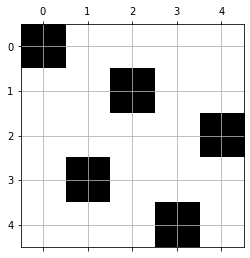

Solution found in 3500 steps


In [ ]:
my_problem = Hetman(5)
solution, n_iters = BFS(my_problem)
if solution:
  visualize_table(solution.state)
  print(f"Solution found in {n_iters} steps")

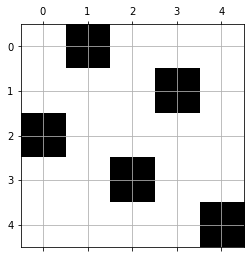

Solution found in 7 steps


In [ ]:
my_problem = Hetman(5)
solution, n_iters = DFS(my_problem)
if solution:
  visualize_table(solution.state)
  print(f"Solution found in {n_iters} steps")